#Student Name: ChengYang Tsai
#ECE 595 Introduction to Deep Learning
#Project 2: Autoencoders - Student Code

In [ ]:
#Import necessary packages
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K

#Part 0: Importing and Normalizing Data

In [ ]:
#Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


#Part 1: Deep Fully-Connected AutoEncoder

Answer the following questions: 


1.  We want to predict output values of the intensity of the pixels which are between 0 to 1. Therefore choice of output layer activation function is important. (Open ended reasoning question). (a) Choose 'softmax’ or ‘sigmoid’. Reason why one is preferred over the other.

  ANS: Sigmoid. Probabilities produced by a sigmoid are independent. In contrast, the outputs of a softmax are all interrelated. We are evaluating the ability of the model to reconstruct certain image by predicting the intensity of all pixels which are independent of each other, so I will choose 'sigmoid' as output layer activation function with MSE Loss which is suitable for a regression problem.
 

In [ ]:
#Reshape training and testing data into 784-dimensional vectors
data_train = data_train.reshape(-1, 784)
data_test = data_test.reshape(-1, 784)
print(data_train.shape)
print(data_test.shape)
#FILL IN THIS CODE BLOCK

(60000, 784)
(10000, 784)


In [ ]:
#Create autoencoder architecture
def deep_ae(act):
    model = Sequential()
    model.add(Dense(400, activation="relu", use_bias=True, kernel_initializer="normal"))
    model.add(Dense(200, activation="relu", use_bias=True, kernel_initializer="normal"))
    model.add(Dense(100, activation="relu", use_bias=True, kernel_initializer="normal"))
    model.add(Dense(200, activation="relu", use_bias=True, kernel_initializer="normal"))
    model.add(Dense(400, activation="relu", use_bias=True, kernel_initializer="normal"))
    model.add(Dense(784, activation= act, use_bias=True, kernel_initializer="normal"))
    #FILL THIS IN WITH MODEL ARCHITECTURE
    return model

I will still test softmax on the output layer with MSE to prove it will not work well.

In [ ]:
#Create deep autoencoder graph

# Softmax and MSE

deep_ae = deep_ae("softmax")
#Compile model using an appropriate loss and optimizer algorithm
deep_ae.compile(loss="mean_squared_error", optimizer="adam")
#FILL THIS IN
#Train the model and assign training meta-data to a variable
deep_ae_history = deep_ae.fit(data_train, data_train, validation_data = (data_test, data_test), epochs=150, batch_size=1024, shuffle=True)
#FILL THIS IN
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = deep_ae.predict(data_test)
#FILL THIS IN
#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl = get_hl([data_test])[0]

Epoch 1/150
59/59 [==============================] - 1s 9ms/step - loss: 0.1115 - val_loss: 0.1128
Epoch 2/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1107 - val_loss: 0.1123
Epoch 3/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1102 - val_loss: 0.1120
Epoch 4/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1100 - val_loss: 0.1119
Epoch 5/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1100 - val_loss: 0.1119
Epoch 6/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1099 - val_loss: 0.1119
Epoch 7/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1099 - val_loss: 0.1118
Epoch 8/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1099 - val_loss: 0.1118
Epoch 9/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1099 - val_loss: 0.1118
Epoch 10/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1098 - val_loss: 0.1118
Epoch 11/

In [ ]:
#Create deep autoencoder graph

# Sigmoid and MSE

deep_ae_1 = deep_ae("sigmoid")
#Compile model using an appropriate loss and optimizer algorithm
deep_ae_1.compile(loss="mean_squared_error", optimizer="adam")
#FILL THIS IN
#Train the model and assign training meta-data to a variable
deep_ae_1_history = deep_ae_1.fit(data_train, data_train, validation_data = (data_test, data_test), epochs=150, batch_size=1024, shuffle=True)
#FILL THIS IN
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions_1 = deep_ae_1.predict(data_test)
#FILL THIS IN
#Obtain encoder representation of data
get_hl_1 = K.function([deep_ae_1.layers[0].input], [deep_ae_1.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl_1 = get_hl_1([data_test])[0]

Epoch 1/150
59/59 [==============================] - 1s 9ms/step - loss: 0.0946 - val_loss: 0.0688
Epoch 2/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0570 - val_loss: 0.0438
Epoch 3/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0365 - val_loss: 0.0303
Epoch 4/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0287 - val_loss: 0.0249
Epoch 5/150
59/59 [==============================] - 0s 7ms/step - loss: 0.0235 - val_loss: 0.0213
Epoch 6/150
59/59 [==============================] - 0s 7ms/step - loss: 0.0204 - val_loss: 0.0189
Epoch 7/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0183 - val_loss: 0.0172
Epoch 8/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0166 - val_loss: 0.0157
Epoch 9/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0154 - val_loss: 0.0144
Epoch 10/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0144 - val_loss: 0.0137
Epoch 11/

In [ ]:
#Create deep autoencoder graph

# Sigmoid and BCE

deep_ae_2 = deep_ae("sigmoid")
#Compile model using an appropriate loss and optimizer algorithm
deep_ae_2.compile(loss="binary_crossentropy", optimizer="adam")
#FILL THIS IN
#Train the model and assign training meta-data to a variable
deep_ae_2_history = deep_ae_2.fit(data_train, data_train, validation_data = (data_test, data_test), epochs=150, batch_size=1024, shuffle=True)
#FILL THIS IN
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions_2 = deep_ae_2.predict(data_test)
#FILL THIS IN

#Obtain encoder representation of data
get_hl_2 = K.function([deep_ae_2.layers[0].input], [deep_ae_2.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl_2 = get_hl_2([data_test])[0]

Epoch 1/150
59/59 [==============================] - 1s 10ms/step - loss: 0.3294 - val_loss: 0.2544
Epoch 2/150
59/59 [==============================] - 0s 7ms/step - loss: 0.2350 - val_loss: 0.2029
Epoch 3/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1778 - val_loss: 0.1553
Epoch 4/150
59/59 [==============================] - 0s 7ms/step - loss: 0.1465 - val_loss: 0.1362
Epoch 5/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1319 - val_loss: 0.1248
Epoch 6/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1229 - val_loss: 0.1186
Epoch 7/150
59/59 [==============================] - 0s 7ms/step - loss: 0.1168 - val_loss: 0.1126
Epoch 8/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1119 - val_loss: 0.1085
Epoch 9/150
59/59 [==============================] - 0s 7ms/step - loss: 0.1079 - val_loss: 0.1049
Epoch 10/150
59/59 [==============================] - 0s 7ms/step - loss: 0.1043 - val_loss: 0.1017
Epoch 11

In [ ]:
#Create deep autoencoder graph

# Linear and MSE

deep_ae_3 = deep_ae("linear")
#Compile model using an appropriate loss and optimizer algorithm
deep_ae_3.compile(loss="mean_squared_error", optimizer="adam")
#FILL THIS IN
#Train the model and assign training meta-data to a variable
deep_ae_3_history = deep_ae_3.fit(data_train, data_train, validation_data = (data_test, data_test), epochs=150, batch_size=1024, shuffle=True)
#FILL THIS IN
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions_3 = deep_ae_3.predict(data_test)
#FILL THIS IN

#Obtain encoder representation of data
get_hl_3 = K.function([deep_ae_3.layers[0].input], [deep_ae_3.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl_3 = get_hl_3([data_test])[0]

Epoch 1/150
59/59 [==============================] - 1s 9ms/step - loss: 0.0599 - val_loss: 0.0385
Epoch 2/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0317 - val_loss: 0.0264
Epoch 3/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0237 - val_loss: 0.0212
Epoch 4/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0199 - val_loss: 0.0181
Epoch 5/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0177 - val_loss: 0.0176
Epoch 6/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0162 - val_loss: 0.0149
Epoch 7/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0153 - val_loss: 0.0141
Epoch 8/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0147 - val_loss: 0.0142
Epoch 9/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0143 - val_loss: 0.0129
Epoch 10/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0131 - val_loss: 0.0144
Epoch 11/

In [ ]:
#Create deep autoencoder graph

# Linear and BCE

deep_ae_4 = deep_ae("linear")
#Compile model using an appropriate loss and optimizer algorithm
deep_ae_4.compile(loss="binary_crossentropy", optimizer="adam")
#FILL THIS IN
#Train the model and assign training meta-data to a variable
deep_ae_4_history = deep_ae_4.fit(data_train, data_train, validation_data = (data_test, data_test), epochs=150, batch_size=1024, shuffle=True)
#FILL THIS IN
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions_4 = deep_ae_4.predict(data_test)
#FILL THIS IN

#Obtain encoder representation of data
get_hl_4 = K.function([deep_ae_4.layers[0].input], [deep_ae_4.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl_4 = get_hl_4([data_test])[0]

Epoch 1/150
59/59 [==============================] - 1s 9ms/step - loss: 0.5120 - val_loss: 0.4191
Epoch 2/150
59/59 [==============================] - 0s 7ms/step - loss: 0.3902 - val_loss: 0.3386
Epoch 3/150
59/59 [==============================] - 0s 6ms/step - loss: 0.3004 - val_loss: 0.2927
Epoch 4/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2509 - val_loss: 0.2275
Epoch 5/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2301 - val_loss: 0.2163
Epoch 6/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2124 - val_loss: 0.1988
Epoch 7/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1993 - val_loss: 0.1965
Epoch 8/150
59/59 [==============================] - 0s 7ms/step - loss: 0.2190 - val_loss: 0.2050
Epoch 9/150
59/59 [==============================] - 0s 7ms/step - loss: 0.2010 - val_loss: 0.1933
Epoch 10/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1933 - val_loss: 0.1918
Epoch 11/

In [ ]:
def plot_loss_ep(y, title):
  plt.plot(y.history['loss'])
  plt.plot(y.history['val_loss'])
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

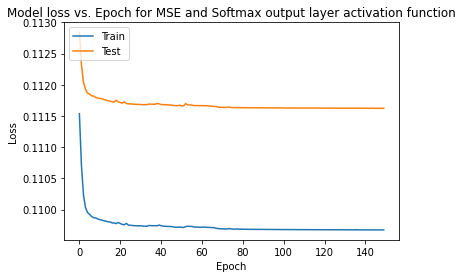

In [ ]:
#Plot loss vs epoch for BCE and MSE [Together or separate, Both accepted]
plot_loss_ep(deep_ae_history, "Model loss vs. Epoch for MSE and Softmax output layer activation function")
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

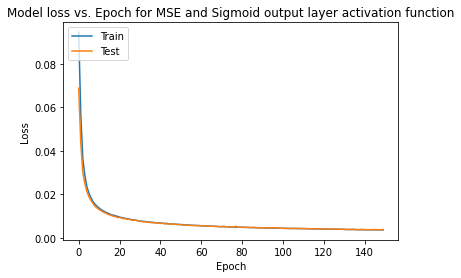

In [ ]:
#Plot loss vs epoch for BCE and MSE [Together or separate, Both accepted]
plot_loss_ep(deep_ae_1_history, "Model loss vs. Epoch for MSE and Sigmoid output layer activation function")
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

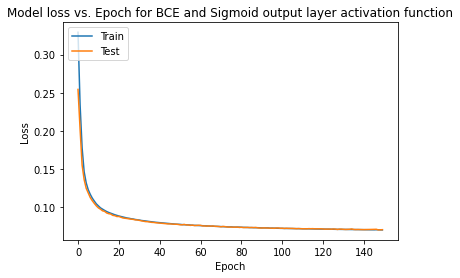

In [ ]:
#Plot loss vs epoch for BCE and MSE [Together or separate, Both accepted]
plot_loss_ep(deep_ae_2_history, "Model loss vs. Epoch for BCE and Sigmoid output layer activation function")
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

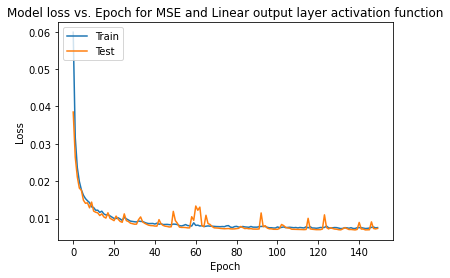

In [ ]:
#Plot loss vs epoch for BCE and MSE [Together or separate, Both accepted]
plot_loss_ep(deep_ae_3_history, "Model loss vs. Epoch for MSE and Linear output layer activation function")
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

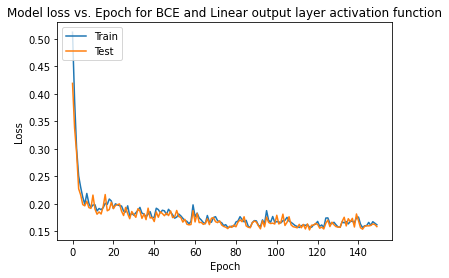

In [ ]:
#Plot loss vs epoch for BCE and MSE [Together or separate, Both accepted]
plot_loss_ep(deep_ae_4_history, "Model loss vs. Epoch for BCE and Linear output layer activation function")
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

In [ ]:
def image(img, number, size, title):
  plt.figure(figsize=(15, 2))
  plt.suptitle(title)
  for i in range(number):
    ax = plt.subplot(1, number, i+1)
    plt.imshow(img[i].reshape(size,size))
    plt.title(i)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

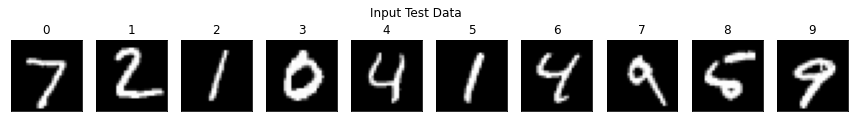

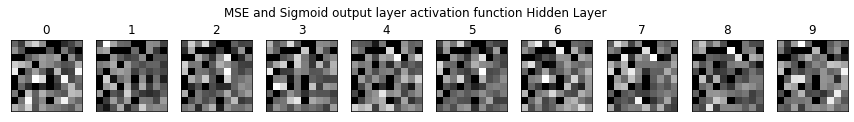

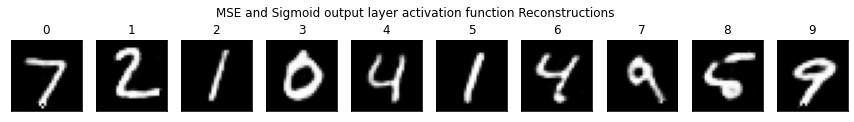

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
image(data_test, 10, 28, "Input Test Data")  
image(deep_ae_hl_1, 10, 10, "MSE and Sigmoid output layer activation function Hidden Layer")
image(reconstructions_1, 10, 28, "MSE and Sigmoid output layer activation function Reconstructions")
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES

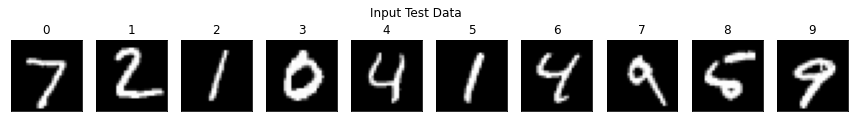

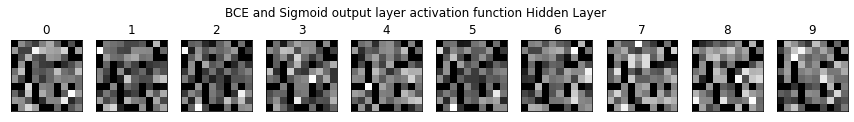

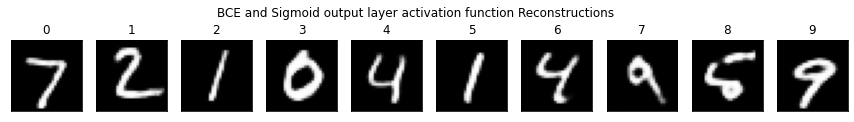

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
image(data_test, 10, 28, "Input Test Data")  
image(deep_ae_hl_2, 10, 10, "BCE and Sigmoid output layer activation function Hidden Layer")
image(reconstructions_2, 10, 28, "BCE and Sigmoid output layer activation function Reconstructions")
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES

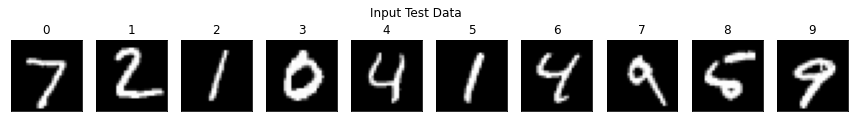

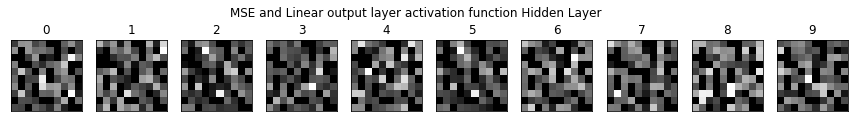

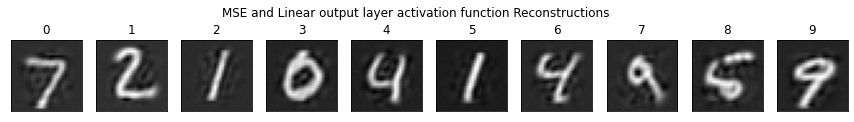

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
image(data_test, 10, 28, "Input Test Data")  
image(deep_ae_hl_3, 10, 10, "MSE and Linear output layer activation function Hidden Layer")
image(reconstructions_3, 10, 28, "MSE and Linear output layer activation function Reconstructions")
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES

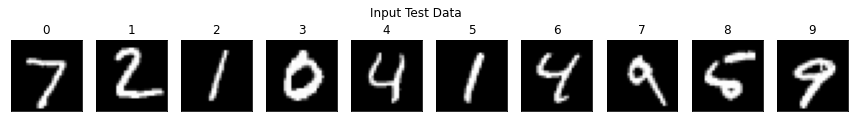

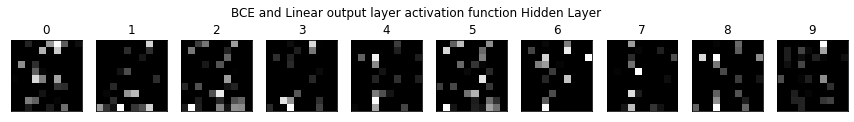

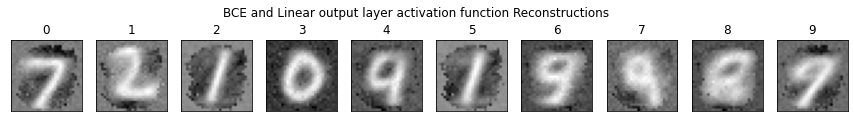

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
image(data_test, 10, 28, "Input Test Data")  
image(deep_ae_hl_4, 10, 10, "BCE and Linear output layer activation function Hidden Layer")
image(reconstructions_4, 10, 28, "BCE and Linear output layer activation function Reconstructions")
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES

Answer the following questions: 


1.  Question 2c: BONUS [reasoning question]: Pair the output layer activation and loss function which performs better together. Linear, sigmoid, Binary cross entropy and Mean Square error

  ANS: Pairing Sigmoid and MSE perform the best.
 

2.  Question 5: Which loss function is better and why?

  ANS: For the Linear and Sigmoid as output layer activation, MSE is better. The output variable is a real or continuous value, so it can be considered as a regression problem and MSE Loss is suitable in a regression problem.

3.  Question 6: If we were to predict pixels values [0 to 255] directly at the output of last layer. Should there be an activation function in last later?  If yes, which activation function and why?,  If No, reason why?

  ANS: Yes. Because our original values are in [0 to 1] and the representation metric between input and output should be the same, we could replace sigmoid with 255*sigmoid as our output layer activation function.   

#Part 2: Deep Convolutional AutoEncoder

In [ ]:
#Reshape data into 2-D signals and account for grayscale channel in each image
data_train_cae = data_train.reshape(60000, 28, 28, 1)
data_test_cae = data_test.reshape(10000, 28, 28, 1)
print(data_train_cae.shape)
print(data_test_cae.shape)
#FILL IN THIS CODE BLOCK

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), use_bias=True, activation="relu", padding="same", kernel_initializer="he_normal", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), use_bias=True, activation="relu", padding="same", kernel_initializer="he_normal"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), use_bias=True, activation="relu", padding="same", kernel_initializer="he_normal"))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(16, (3, 3), use_bias=True, activation="relu", padding="same", kernel_initializer="he_normal"))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(1, (3, 3), use_bias=True, activation="sigmoid", padding="same", kernel_initializer="he_normal"))
    #FILL THIS IN WITH MODEL ARCHITECTURE
    return model

In [ ]:
#Create deep autoencoder graph
conv_ae = cae()
#Compile model using an appropriate loss and optimizer algorithm
conv_ae.compile(optimizer="adam", loss="mean_squared_error")
#FILL THIS IN
#Train the model and assign training meta-data to a variable
conv_ae_history = conv_ae.fit(data_train_cae, data_train_cae, validation_data = (data_test_cae, data_test_cae), epochs=150, batch_size=1024, shuffle=True)
#FILL THIS IN
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions_cae = conv_ae.predict(data_test_cae)
#FILL THIS IN
#Obtain encoder representation of data
get_hl_cae = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl = get_hl_cae([data_test_cae])[0]

Epoch 1/150
59/59 [==============================] - 16s 20ms/step - loss: 0.0893 - val_loss: 0.0391
Epoch 2/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0279 - val_loss: 0.0202
Epoch 3/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0175 - val_loss: 0.0148
Epoch 4/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0138 - val_loss: 0.0123
Epoch 5/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0120 - val_loss: 0.0110
Epoch 6/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0109 - val_loss: 0.0102
Epoch 7/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0102 - val_loss: 0.0096
Epoch 8/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 9/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0092 - val_loss: 0.0087
Epoch 10/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0088 - val_loss: 0.008

In [ ]:
#Create deep autoencoder graph
conv_ae_1 = cae()
#Compile model using an appropriate loss and optimizer algorithm
conv_ae_1.compile(optimizer="adam", loss="binary_crossentropy")
#FILL THIS IN
#Train the model and assign training meta-data to a variable
conv_ae_1_history = conv_ae_1.fit(data_train_cae, data_train_cae, validation_data = (data_test_cae, data_test_cae), epochs=150, batch_size=1024, shuffle=True)
#FILL THIS IN
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions_cae_1 = conv_ae_1.predict(data_test_cae)
#FILL THIS IN
#Obtain encoder representation of data
get_hl_cae_1 = K.function([conv_ae_1.layers[0].input], [conv_ae_1.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl_1 = get_hl_cae_1([data_test_cae])[0]

Epoch 1/150
59/59 [==============================] - 2s 19ms/step - loss: 0.3039 - val_loss: 0.1597
Epoch 2/150
59/59 [==============================] - 1s 15ms/step - loss: 0.1420 - val_loss: 0.1254
Epoch 3/150
59/59 [==============================] - 1s 15ms/step - loss: 0.1178 - val_loss: 0.1096
Epoch 4/150
59/59 [==============================] - 1s 15ms/step - loss: 0.1065 - val_loss: 0.1013
Epoch 5/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0996 - val_loss: 0.0957
Epoch 6/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0949 - val_loss: 0.0919
Epoch 7/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0917 - val_loss: 0.0893
Epoch 8/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0893 - val_loss: 0.0873
Epoch 9/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0876 - val_loss: 0.0858
Epoch 10/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0861 - val_loss: 0.0845

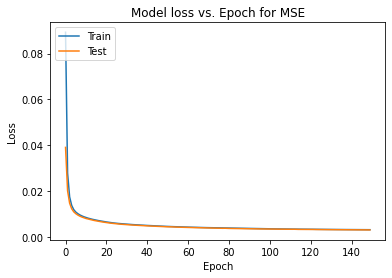

In [ ]:
#Plot loss vs epoch  for BCE and MSE [Together or separate, Both accepted]
plot_loss_ep(conv_ae_history, "Model loss vs. Epoch for MSE")
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

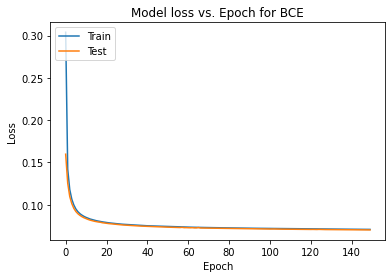

In [ ]:
#Plot loss vs epoch  for BCE and MSE [Together or separate, Both accepted]
plot_loss_ep(conv_ae_1_history, "Model loss vs. Epoch for BCE")
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

In [ ]:
def image_2(img, number, size, size2, title):
  plt.figure(figsize=(15, 2))
  plt.suptitle(title)
  for i in range(number):
    ax = plt.subplot(1, number, i+1)
    plt.imshow(img[i].reshape(size,size2))
    #print(img[i].reshape(size,size2).shape)
    plt.title(i)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

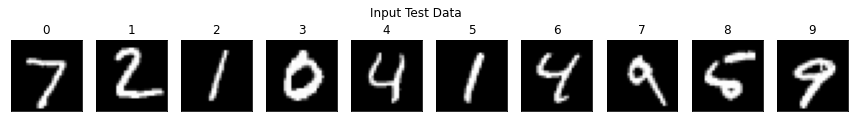

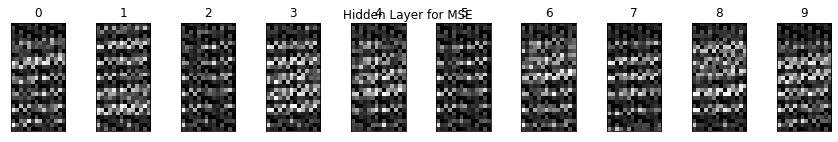

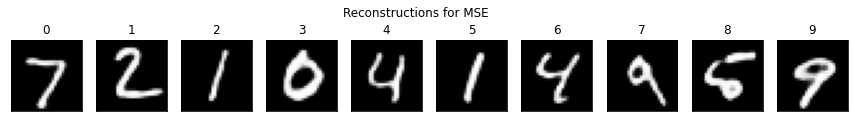

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
image_2(data_test_cae, 10, 28, 28, "Input Test Data")  
image_2(conv_ae_hl, 10, 28, 14, "Hidden Layer for MSE")
image_2(reconstructions_cae, 10, 28, 28, "Reconstructions for MSE")
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES

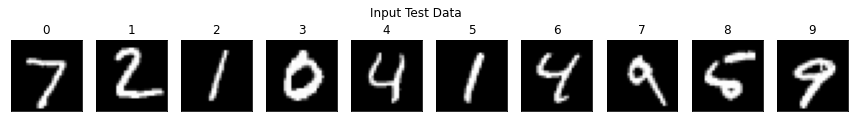

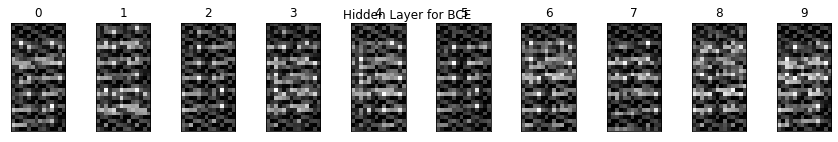

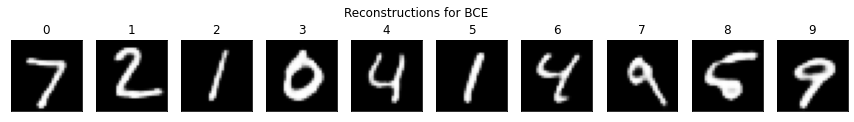

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
image_2(data_test_cae, 10, 28, 28, "Input Test Data")  
image_2(conv_ae_hl_1, 10, 28, 14, "Hidden Layer for BCE")
image_2(reconstructions_cae_1, 10, 28, 28, "Reconstructions for BCE")
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES

Answer the following questions: 


1.  Question 4: Which loss function is better and why?

  ANS: MSE is better because it can be considered as a regression problem, which MSE performs well in.

#Part 3: Denoising AutoEncoder

In [ ]:
#Inject noise into testing data
noise_factor = 0.25
data_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
data_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)

#Clip to stay within valid (normalized) pixel range
data_train_noisy = np.clip(data_train_noisy, 0., 1.)
data_test_noisy = np.clip(data_test_noisy, 0., 1.)

#Reshape data to comply with input of denoising autoencoder
data_train = data_train.reshape(data_train_cae.shape)
data_test = data_test.reshape(data_test_cae.shape)
data_train_noisy = data_train_noisy.reshape(data_train_cae.shape)
print(data_train_noisy.shape)
data_test_noisy = data_test_noisy.reshape(data_test_cae.shape)
print(data_test_noisy.shape)
#FILL THIS IN

(60000, 28, 28, 1)
(10000, 28, 28, 1)


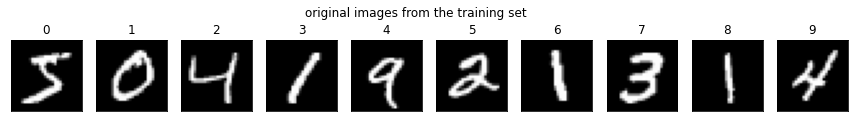

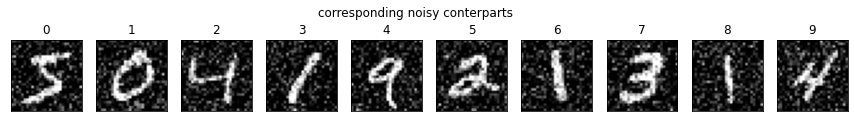

In [ ]:
#Show samples of 10 original images and their corrsponding noisy counterparts from the training set
image_2(data_train, 10, 28, 28, "original images from the training set")
image_2(data_train_noisy, 10, 28, 28, "corresponding noisy conterparts")
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES

In [ ]:
#Create denoising autoencoder architecture
def dae():

    #FILL THIS IN WITH MODEL ARCHITECTURE
    model = Sequential()
    model.add(Conv2D(16, (3, 3), use_bias=True, activation="relu", padding="same", kernel_initializer="he_normal", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), use_bias=True, activation="relu", padding="same", kernel_initializer="he_normal"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, (3, 3), use_bias=True, activation="relu", padding="same", kernel_initializer="he_normal"))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(16, (3, 3), use_bias=True, activation="relu", padding="same", kernel_initializer="he_normal"))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(1, (3, 3), use_bias=True, activation="sigmoid", padding="same", kernel_initializer="he_normal"))
    #FILL THIS IN WITH MODEL ARCHITECTURE
    return model
  

  
#Compile and train the DAE
dae = dae()
#Compile model using an appropriate loss and optimizer algorithm
dae.compile(optimizer="adam", loss="mean_squared_error")
#FILL THIS IN
#Train the model and assign training meta-data to a variable
dae_history = dae.fit(data_train_noisy, data_train, validation_data = (data_test_noisy, data_test), epochs=150, batch_size=1024, shuffle=True)
#FILL THIS IN
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions_dae = dae.predict(data_test_noisy)
#FILL THIS IN
#Obtain encoder representation of data
get_hl_dae = K.function([dae.layers[0].input], [dae.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl_dae = get_hl_dae([data_test_noisy])[0]
#FILL THIS IN


#Generate denoised versions of noisy inputs
#FILL THIS IN


Epoch 1/150
59/59 [==============================] - 1s 18ms/step - loss: 0.1632 - val_loss: 0.1145
Epoch 2/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0801 - val_loss: 0.0435
Epoch 3/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0349 - val_loss: 0.0283
Epoch 4/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0256 - val_loss: 0.0227
Epoch 5/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0216 - val_loss: 0.0198
Epoch 6/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0192 - val_loss: 0.0179
Epoch 7/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0176 - val_loss: 0.0165
Epoch 8/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0164 - val_loss: 0.0155
Epoch 9/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0155 - val_loss: 0.0147
Epoch 10/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0148 - val_loss: 0.0142

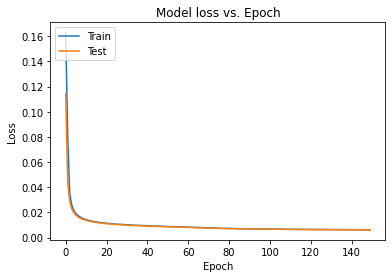

In [ ]:
#Plot loss vs epoch
plot_loss_ep(dae_history, "Model loss vs. Epoch")
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

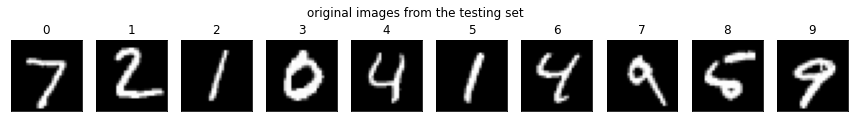

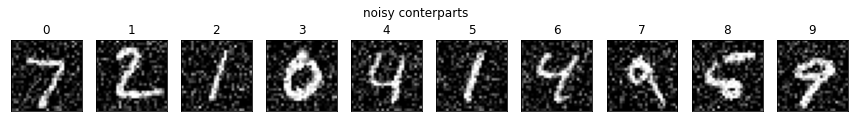

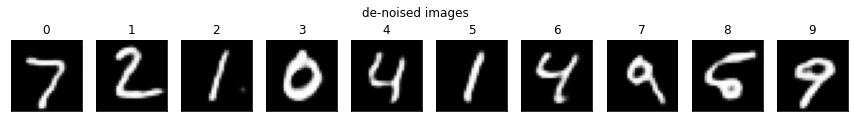

In [ ]:
#Show samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set
image_2(data_test, 10, 28, 28, "original images from the testing set")
image_2(data_test_noisy, 10, 28, 28, "noisy conterparts")
image_2(reconstructions_dae, 10, 28, 28, "de-noised images")
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES